In [1]:
%matplotlib inline

In [2]:
import pickle
import matplotlib.pyplot as plt

In [4]:
with open('../results/samples/200629_PosteriorSNL_NumSpikesCalibrated_VI_samples.pickle', 'rb') as handle:
    saved_samples = pickle.load(handle)

In [5]:
import sys
sys.path.append('../')

In [6]:
len(saved_samples)

10000

In [7]:
from utils import simulator_wrapper, simulator_ss_wrapper, load_ground_truth_params, summary_stats

/home/michael/Documents/Data_arco8/test_env/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/michael/Documents/in_silico_framework/model_data_base/distributed_lock.py:14: UserWarning: environment variable ISF_DISTRIBUTED_LOCK_CONFIG is not set. Falling back to default configuration.
  'Falling back to default configuration.')
/home/michael/Documents/in_silico_framework/model_data_base/distributed_lock.py:33: UserWarning: Using file based locking.Please be careful on nfs mounts as file based locking has issues in this case.
  warnings.warn('Using file based locking.'


trying to connect to distributed locking server {'config': {'socket_timeout': 1, 'host': 'spock', 'port': 8885}, 'type': 'redis'}
trying to connect to distributed locking server {'config': {'socket_timeout': 1, 'host': 'localhost', 'port': 6379}, 'type': 'redis'}
trying to connect to distributed locking server {'type': 'file'}
Current version: v0.0.1+646.ga423967
Current pid: 101513
Loading mechanisms:
setting up local multiprocessing framework ... done


The loaded modules with __version__ attribute are:
IPython: 5.1.0, Interface: v0.0.1+646.ga423967, SocketServer: 0.4, _ast: 82160, _csv: 1.0, _ctypes: 1.1.0, _struct: 0.2, argparse: 1.1, ast: 82160, blosc: 1.5.1, bluepyopt: 1.8.5, bottleneck: 1.1.0, cPickle: 1.71, cffi: 1.7.0, cgi: 2.6, chest: 0.2.3, click: 6.6, cloudpickle: 0.2.2, colorama: 0.3.7, csv: 1.0, ctypes: 1.1.0, cycler: 0.10.0, cytoolz: 0.8.0, dask: 0.18.2, dateutil: 2.5.3, deap: 1.2, decimal: 1.70, decorator: 4.0.10, distributed: 1.22.1, distutils: 2.7.12, email: 4.0.3, fu

### Inspect a saved sample

In [8]:
#saved_samples[0]

### Load the ground truth sample

In [26]:
gt_params = load_ground_truth_params()

In [27]:
#gt_params

In [28]:
output = simulator_wrapper(gt_params)
output_ss = simulator_ss_wrapper(gt_params)

stat_mean Vector[1092] 
stat_std Vector[1093] 
punish 250 
use_control 0 
rep_num 1 
minspikenum 2 
stim_del 295 
stim_dur 45 
apcvecList.o[0].size: 3 
feature_num 6 
Checking for minimum spike number...
Checking for returning to rest...
Checking for spikes before stimulus...
Calculating feature AHP_depth_abs
	Err: 0.73095662 
	STD: 4 
	norm. diff: 0.18273916 
Feature error: 0.18273916 
Calculating feature AP_height
Mean spike height: 3.3647061 
	Err: 3.3647061 
	STD: 5 
	norm. diff: 0.67294122 
Feature error: 0.67294122 
Calculating feature BAC_ISI
	Err: 1.7516891 
	STD: 0.8517 
	norm. diff: 2.0566973 
Feature error: 2.0566973 
Calculating feature BAC_caSpike_height
Mean Ca spike height: 3.8782449 
	Err: 3.8782449 
	STD: 2.54 
	norm. diff: 1.5268681 
Feature error: 1.5268681 
Calculating feature BAC_caSpike_width
	Err: 0.81261109 
	STD: 1.27 
	norm. diff: 0.63985125 
Feature error: 0.63985125 
Calculating feature Spikecount
	Err: 0 
	STD: 0.01 
	norm. diff: 0 
Feature error: 0 
stat_m

In [29]:
output_ss

{'BAC_APheight': 0.6729412179349384,
 'BAC_ISI': 2.0566973194972613,
 'BAC_ahpdepth': 0.182739155137412,
 'BAC_caSpike_height': 1.526868085258341,
 'BAC_caSpike_width': 0.6398512531176116,
 'BAC_spikecount': 0.0,
 'bAP_APheight': 1.0677105939115457,
 'bAP_APwidth': 1.8271015455106863,
 'bAP_att2': 0.5062609715603245,
 'bAP_att3': 0.014823934337756788,
 'bAP_spikecount': 0.0}

In [30]:
import numpy as np
np_vals = []
for key in output.keys():
    np_vals.append(output[key])
np_vals = np.asarray(np_vals)

In [31]:
#np.savez('/home/michael/Documents/lfi-experiments/bursting_biophysics/results/observation/x_o_hay.npz', x_o=np_vals, x_o_dict=output)

In [32]:
#import pickle
#with open('/home/michael/Documents/lfi-experiments/bursting_biophysics/results/observation/x_o_hay.pickle', 'wb') as handle:
#    pickle.dump(np_vals, handle)

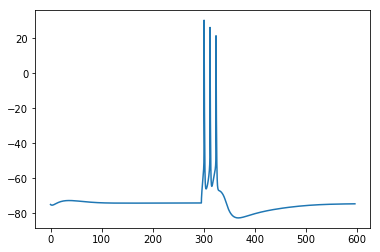

In [33]:
plt.plot(output['BAC.hay_measure']['tVec'], output['BAC.hay_measure']['vList'][0])
plt.show()

In [34]:
x_o = summary_stats(output, n_xcorr=0, n_mom=4)

In [35]:
#import pickle
#with open('../results/observation/x_o_new_ss.pickle', 'wb') as handle:
#    pickle.dump(x_o, handle)
#import numpy as np
#np.savez('../results/observation/x_o_new_ss.npz', x_o=x_o)

In [36]:
x_o

array([  3.00000000e+00,  -7.39717591e+01,   2.66050783e-03,
        -7.03781874e+01,   2.59070194e+02,   2.74266520e+00,
         1.35953871e+01,   1.00000000e+00,  -7.03736112e+01,
         1.35826963e-03,  -5.46362819e+01,   9.47858009e+02,
         7.50336875e-01,   1.92771408e+00,   1.00000000e+00,
        -7.39717591e+01,   2.66050783e-03,  -7.35701912e+01,
         2.93179887e+01,   1.06514191e+01,   1.56181772e+02,
         0.00000000e+00,  -7.03736112e+01,   1.35826963e-03,
        -6.97986229e+01,   2.85391733e+01,   4.83587242e+00,
         2.83883641e+01,   1.00000000e+00,  -6.89818115e+01,
         1.00829906e-03,  -6.85036220e+01,   2.69427188e+01,
         4.68281414e+00,   2.61891455e+01])

In [37]:
x_o[::7]

array([ 3.,  1.,  1.,  0.,  1.])

### Simulate posterior samples

('x', array([  1.00000000e+00,  -8.06105065e+01,   2.39037922e-03,
        -8.26143793e+01,   1.17315898e+02,   6.67646514e+00,
         5.50274310e+01,   1.00000000e+00,  -7.38169919e+01,
         5.63172687e-03,  -7.87064029e+01,   2.24777665e+02,
         3.96931964e+00,   1.91996749e+01,   1.00000000e+00,
        -8.06105065e+01,   2.39037922e-03,  -8.41336597e+01,
         4.03213936e+01,   1.17619399e+01,   1.66428979e+02,
         0.00000000e+00,  -7.38169919e+01,   5.63172687e-03,
        -8.10756264e+01,   5.82980623e+01,   6.59725000e+00,
         5.06934026e+01,   1.00000000e+00,  -7.15718927e+01,
         8.10840177e-03,  -8.01051157e+01,   1.09089244e+02,
         5.36383512e+00,   3.31972189e+01]))


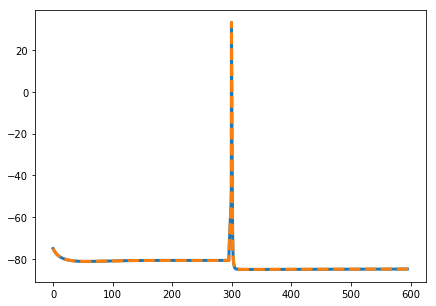

In [21]:
fig, ax = plt.subplots(1,1, figsize=(7, 5))

for i in range(1):
    output = simulator_wrapper(saved_samples[i])
    x = summary_stats(output, n_xcorr=0, n_mom=4)
    print('x', x)
    plt.plot(output['bAP.hay_measure']['tVec'], output['bAP.hay_measure']['vList'][0], linewidth=3.0)
    plt.plot(output['BAC.hay_measure']['tVec'], output['BAC.hay_measure']['vList'][0], linestyle='--', linewidth=3.0)
plt.show()

('x', array([ 1.,  1.,  1.,  0.,  1.]))
('x', array([ 1.,  1.,  1.,  0.,  1.]))
('x', array([ 1.,  1.,  1.,  0.,  1.]))
('x', array([ 1.,  1.,  1.,  0.,  1.]))
('x', array([ 1.,  1.,  1.,  0.,  0.]))


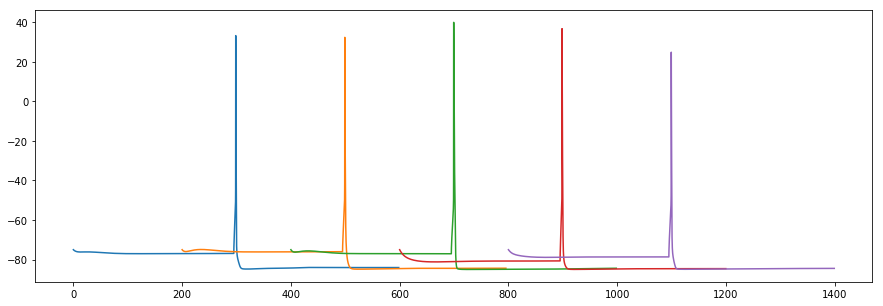

In [25]:
counter = 0
for _ in range(1):

    fig, ax = plt.subplots(1,1, figsize=(15, 5))

    for i in range(5):
        counter += 1
        output = simulator_wrapper(saved_samples[counter])
        x = summary_stats(output, n_xcorr=0, n_mom=4)
        print('x', x[::7])
        #x = summary_stats(output, n_xcorr=0, n_mom=4)
        #plt.plot(output['bAP.hay_measure']['tVec']+(i*200), output['bAP.hay_measure']['vList'][0], linewidth=3.0)
        plt.plot(output['BAC.hay_measure']['tVec']+(i*200), output['BAC.hay_measure']['vList'][0])
    #plt.savefig('../results/figures/200623_round1_SNL_posteriorPredictives_VI_BAC.png', dpi=200, bbox_inches='tight')
    plt.show()

### Prior predictives

In [44]:
with open('../results/samples/200617_prior_theta.pickle', 'rb') as handle:
    theta_list=pickle.load(handle)

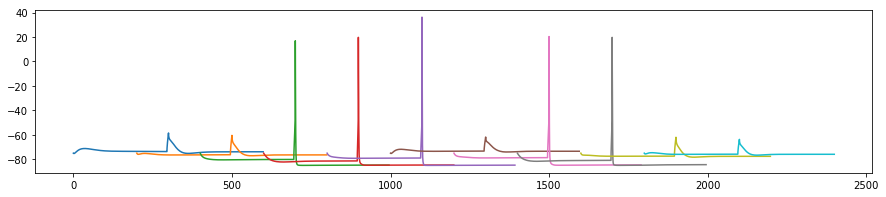

In [46]:
fig, ax = plt.subplots(1,1, figsize=(15, 3))

for i in range(10):
    output = simulator_wrapper(theta_list[i])
    x = summary_stats(output, n_xcorr=0, n_mom=4)
    
    plt.plot(output['BAC.hay_measure']['tVec']+(i*200), output['BAC.hay_measure']['vList'][0])
plt.savefig('../results/figures/200618_round1_SNPE_priorPredictives1.png', dpi=200, bbox_inches='tight')
plt.show()